In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

I started by importing the essential Python libraries for data analysis and visualization.  
- **Pandas** and **NumPy** will help me handle and process the dataset efficiently.  
- For visual exploration, I included **Matplotlib** and **Seaborn**, which give me flexibility in creating clear and insightful plots.  
- I also suppressed warnings to keep my notebook output clean.  
- Finally, I set Pandas to display up to 100 columns, so I don’t miss any details while exploring the dataset.  

In [328]:
sheet_id = "1uiQfhlb0isYp2JefSVzIJOngN0viwsP0PzcMab-dUw8"
sheet_name = "indian_liver_patient"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

To load my dataset directly from Google Sheets into Python,  
I used the **sheet ID** and **sheet name** to generate a CSV export link.  

- `sheet_id` is the unique identifier of the Google Sheet.  
- `sheet_name` specifies which tab (worksheet) inside the sheet I want.  
- Using an f-string, I created a URL that allows me to fetch the sheet as a CSV file.  

This way, I can directly read the data into Pandas without manually downloading the file.  

In [329]:
df = pd.read_csv(url)
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


I loaded the dataset into a Pandas DataFrame using the generated URL.  
- By passing `index_col=0`, I set the first column as the index of the DataFrame.  
- Then, I used `df.head()` to preview the first 5 rows and confirm that the data was loaded correctly.  

In [330]:
df.shape

(583, 11)

The `df.shape` command returns the dimensions of the dataset.  
Here, the DataFrame has **583 rows** and **10 columns**.  

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### Dataset Report  
- Total entries: **583**  
- Total columns: **11**  
- Column types: **5 int, 5 float, 1 object**  
- Missing values: **Albumin_and_Globulin_Ratio (4 nulls)**  
- Memory usage: ~**50 KB**  


In [332]:
df.duplicated().sum()

np.int64(13)

The dataset contains **13 duplicated rows** identified using `df.duplicated().sum()`.  
These duplicates may need to be removed for clean analysis.  

In [333]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

After applying `df.drop_duplicates(inplace=True)`, all duplicate rows were removed.  
Now, `df.duplicated().sum()` returns **0**, confirming a clean dataset.

In [334]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [335]:
df.dropna(inplace=True)
print(df.isna().sum())
print("Dataset shape",df.shape)

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64
Dataset shape (566, 11)


The `df.dropna(inplace=True)` command removed rows with missing values.  
Now, `df.isna().sum()` shows **0 null values** across all columns.  


In [336]:
df.reset_index(drop=True,inplace=True)

In [337]:
df.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,566.000000,566,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.886926,NaN,3.338869,1.505830,292.567138,80.143110,109.892226,6.494876,3.145583,0.948004,1.286219
std,16.274893,NaN,6.286728,2.841485,245.936559,182.044881,291.841897,1.087512,0.795745,0.319635,0.452393
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000


## Columns Overview  
1. **Age**: Integer, range 4–90 years, mean ≈ 45 years  
2. **Gender**: Categorical (Male = 428, Female = remaining)  
3. **Total_Bilirubin**: Float, 0.4–75.0, mean ≈ 3.34  
4. **Direct_Bilirubin**: Float, 0.1–19.7, mean ≈ 1.51  
5. **Alkaline_Phosphotase**: Integer, 63–2110, mean ≈ 293  
6. **Alamine_Aminotransferase (ALT)**: Integer, 10–2000, mean ≈ 80  
7. **Aspartate_Aminotransferase (AST)**: Integer, 10–4929, mean ≈ 110  
8. **Total_Proteins**: Float, 2.7–9.6, mean ≈ 6.49  
9. **Albumin**: Float, 0.9–5.5, mean ≈ 3.15  
10. **Albumin_and_Globulin_Ratio (A/G Ratio)**: Float, 0.3–2.8, mean ≈ 0.95  
11. **Dataset (Target Variable)**: Integer → Binary classification (1, 2)  

In [338]:
df.columns = [i.lower() for i in df.columns]

for i in df.select_dtypes(include='object').columns:
    df[i] = df[i].apply(lambda x: x.lower())

The column names were converted to **lowercase** for consistency.  
Also, all string values in categorical columns (like `gender`) were transformed to **lowercase** to maintain uniform formatting.  

In [339]:
cat_col = df.select_dtypes(include='object')
num_col = df.select_dtypes(include=['int64','float64']).drop(columns=['dataset'])
y = df['dataset']

In [340]:
num_col

,age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...
561,60,0.5,0.1,500,20,34,5.9,1.6,0.37
562,40,0.6,0.1,98,35,31,6.0,3.2,1.10
563,52,0.8,0.2,245,48,49,6.4,3.2,1.00
564,31,1.3,0.5,184,29,32,6.8,3.4,1.00


## EDA & Feauture Selection

In [341]:
my_col = ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1"]

A custom color palette `my_col` was defined with **5 colors**:  

- `#FF6F61` → Coral Red  
- `#6B5B95` → Purple  
- `#88B04B` → Green  
- `#F7CAC9` → Pink  
- `#92A8D1` → Light Blue  

This palette can be used for **data visualizations** (e.g., plots, charts).  


### univariate Analysis

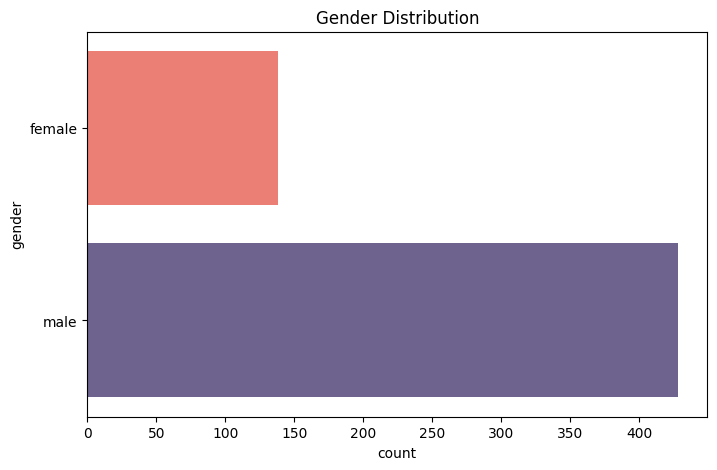

In [342]:
plt.figure(figsize=(8,5))
sns.countplot(df['gender'], palette=my_col)
plt.title("Gender Distribution")
plt.show()

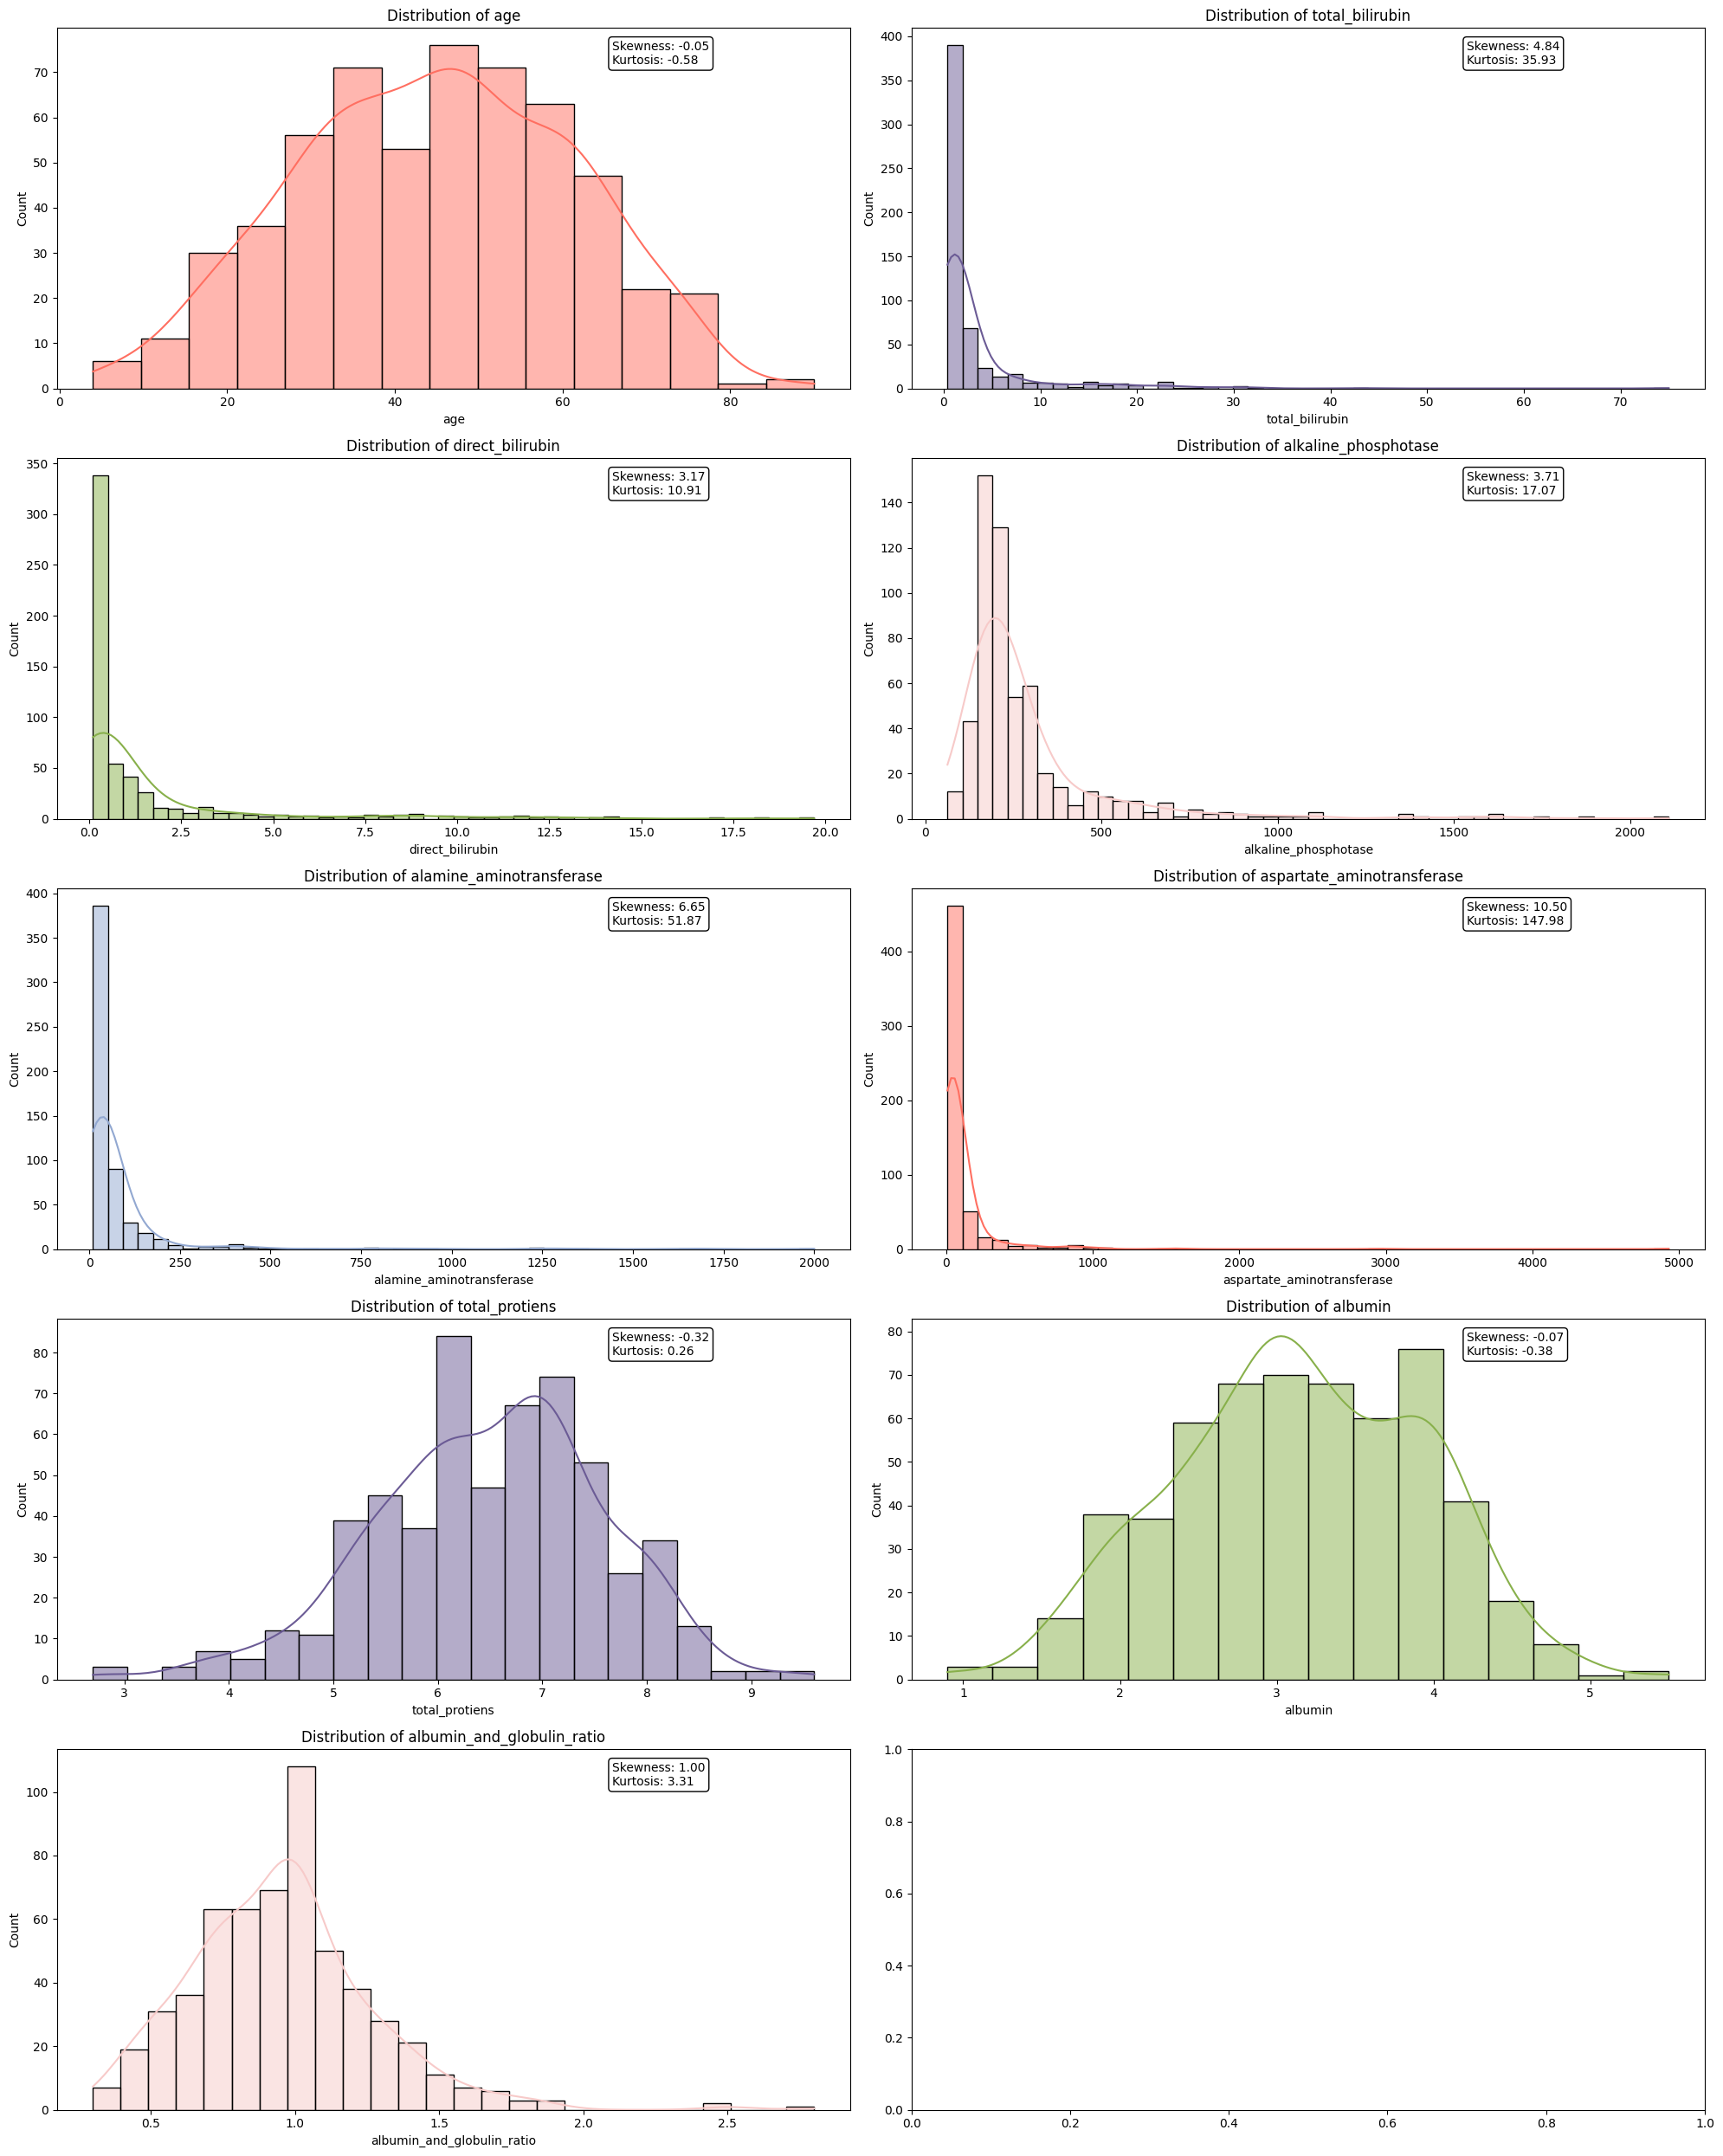

In [343]:
from scipy.stats import skew, kurtosis

n_col =2 
n_row = (len(num_col.columns) + 1) // n_col

fig, ax = plt.subplots(n_row, n_col, figsize=(20, 5*n_row))
ax = ax.flatten()

for i,col in enumerate(num_col.columns):
    sns.histplot(df[col], kde=True, ax=ax[i],color=my_col[i%5])
    skewness = skew(df[col])
    kurt = kurtosis(df[col])
    ax[i].text(0.7, 0.9, f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}', transform=ax[i].transAxes,
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black'))
    ax[i].set_title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()

<Axes: xlabel='dataset'>

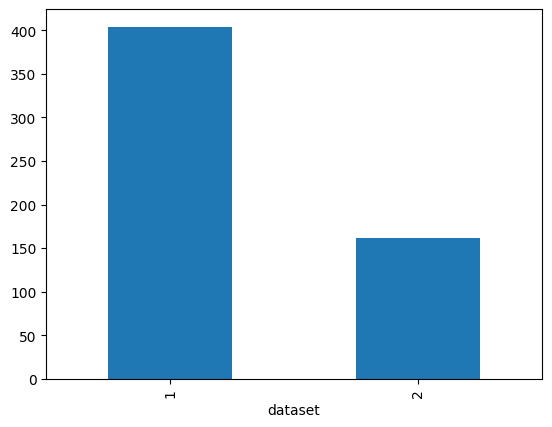

In [344]:
y.value_counts().plot(kind='bar')

### Bi variate Analysis Based on Target Column

<Axes: xlabel='dataset', ylabel='gender'>

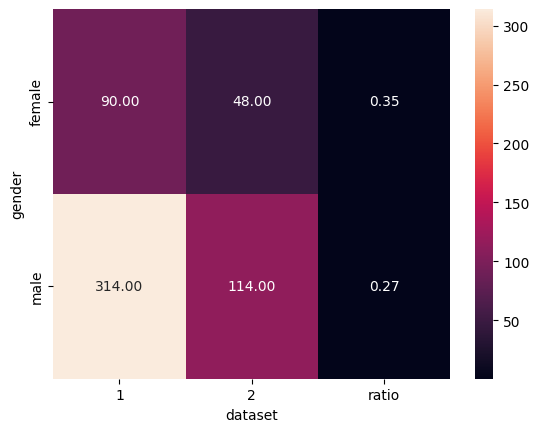

In [345]:
cross_tab = pd.crosstab(df['gender'],df['dataset'])
cross_tab['ratio'] = cross_tab[2]/(cross_tab[1]+cross_tab[2])
cross_tab = cross_tab.sort_values(by ='ratio',ascending=False)
sns.heatmap(cross_tab,annot=True,fmt='.2f')

In [346]:
cross_tab

dataset,1,2,ratio
gender,,,
female,90,48,0.347826
male,314,114,0.266355


In [347]:

from scipy.stats import chi2_contingency


data = pd.crosstab(df['gender'],df['dataset'])


chi2, p, dof, expected = chi2_contingency(data)

print("Chi-Square Statistic:", round(chi2, 2))
print("Degrees of Freedom:", dof)
print("p-value:", round(p, 4))
print("Expected Frequencies:\n", expected)


alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis → Gender and dataset are related.")
else:
    print("Fail to reject null hypothesis → No relationship.")

Chi-Square Statistic: 3.0
Degrees of Freedom: 1
p-value: 0.0831
Expected Frequencies:
 [[ 98.50176678  39.49823322]
 [305.49823322 122.50176678]]
Fail to reject null hypothesis → No relationship.


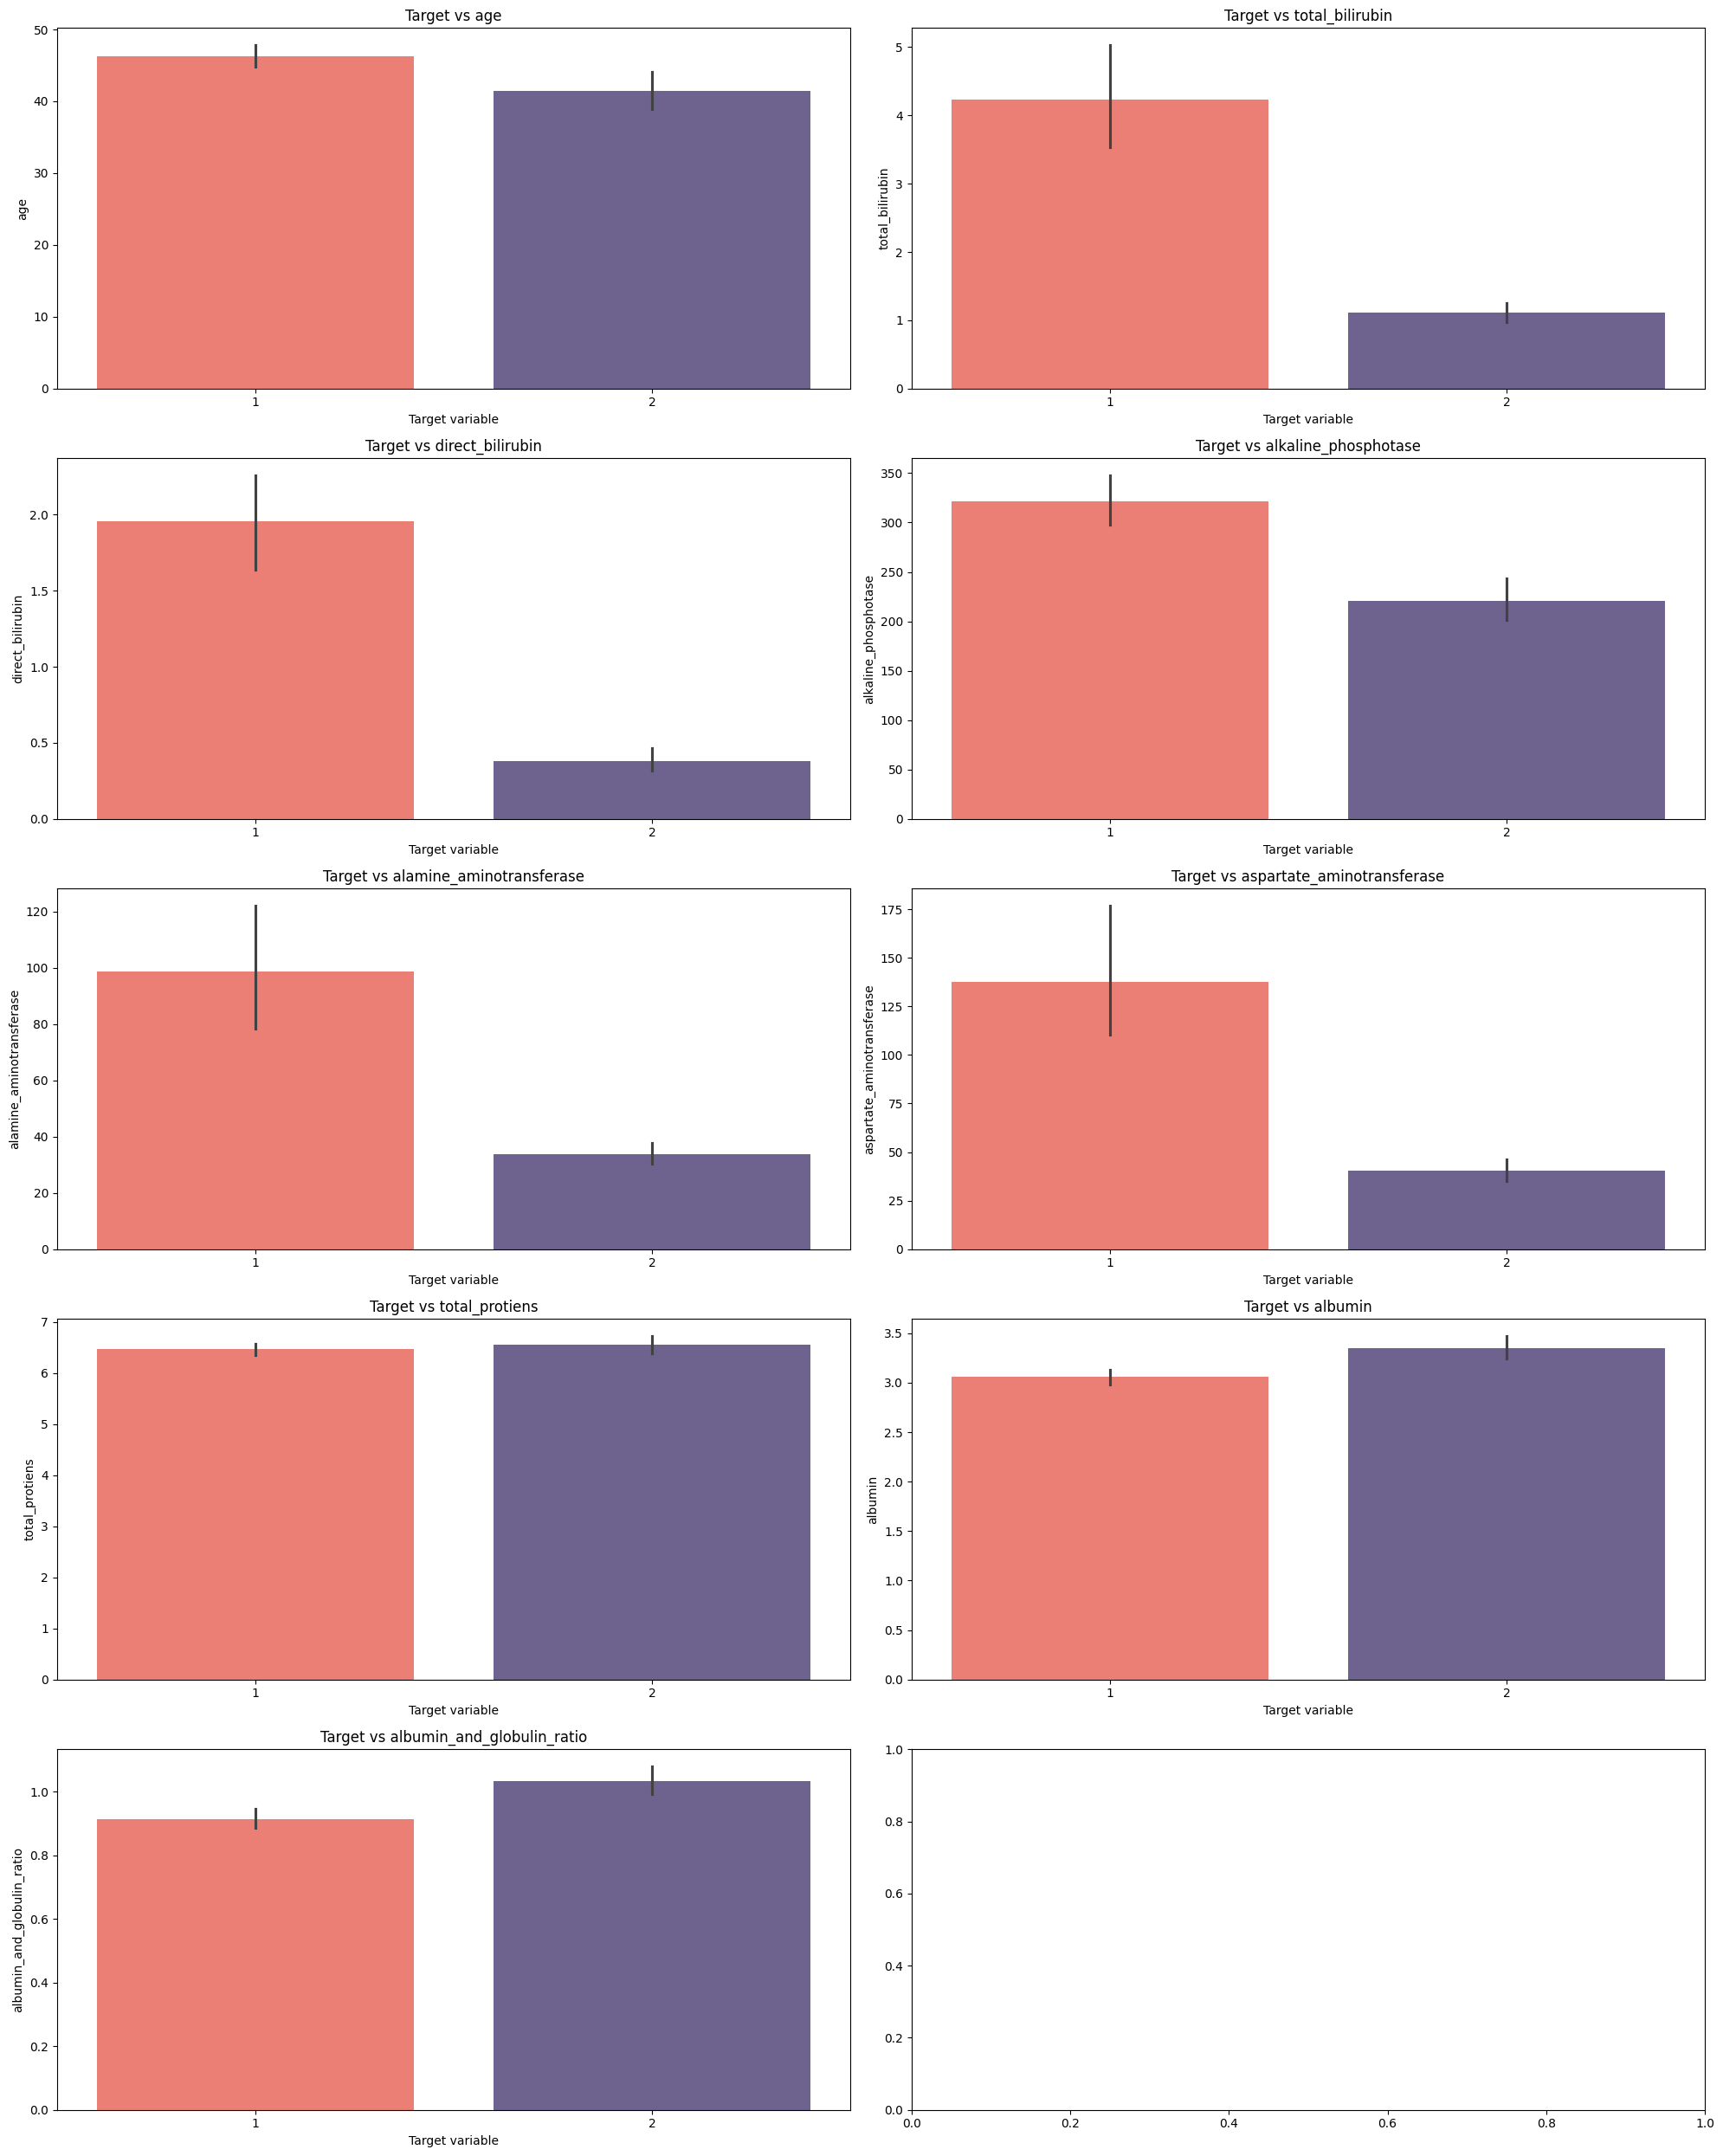

In [348]:
n_col =2 
n_row = (len(num_col.columns) + 1) // n_col

fig, ax = plt.subplots(n_row, n_col, figsize=(20, 5*n_row))
ax = ax.flatten()

for i,col in enumerate(num_col.columns):
    sns.barplot(df,x = 'dataset', y = col,ax = ax[i],palette=my_col)
    ax[i].set_title(f"Target vs {col}")
    ax[i].set_xlabel("Target variable")
    
plt.tight_layout()
plt.show()

In [349]:
num_col.columns

Index(['age', 'total_bilirubin', 'direct_bilirubin', 'alkaline_phosphotase',
       'alamine_aminotransferase', 'aspartate_aminotransferase',
       'total_protiens', 'albumin', 'albumin_and_globulin_ratio'],
      dtype='object')

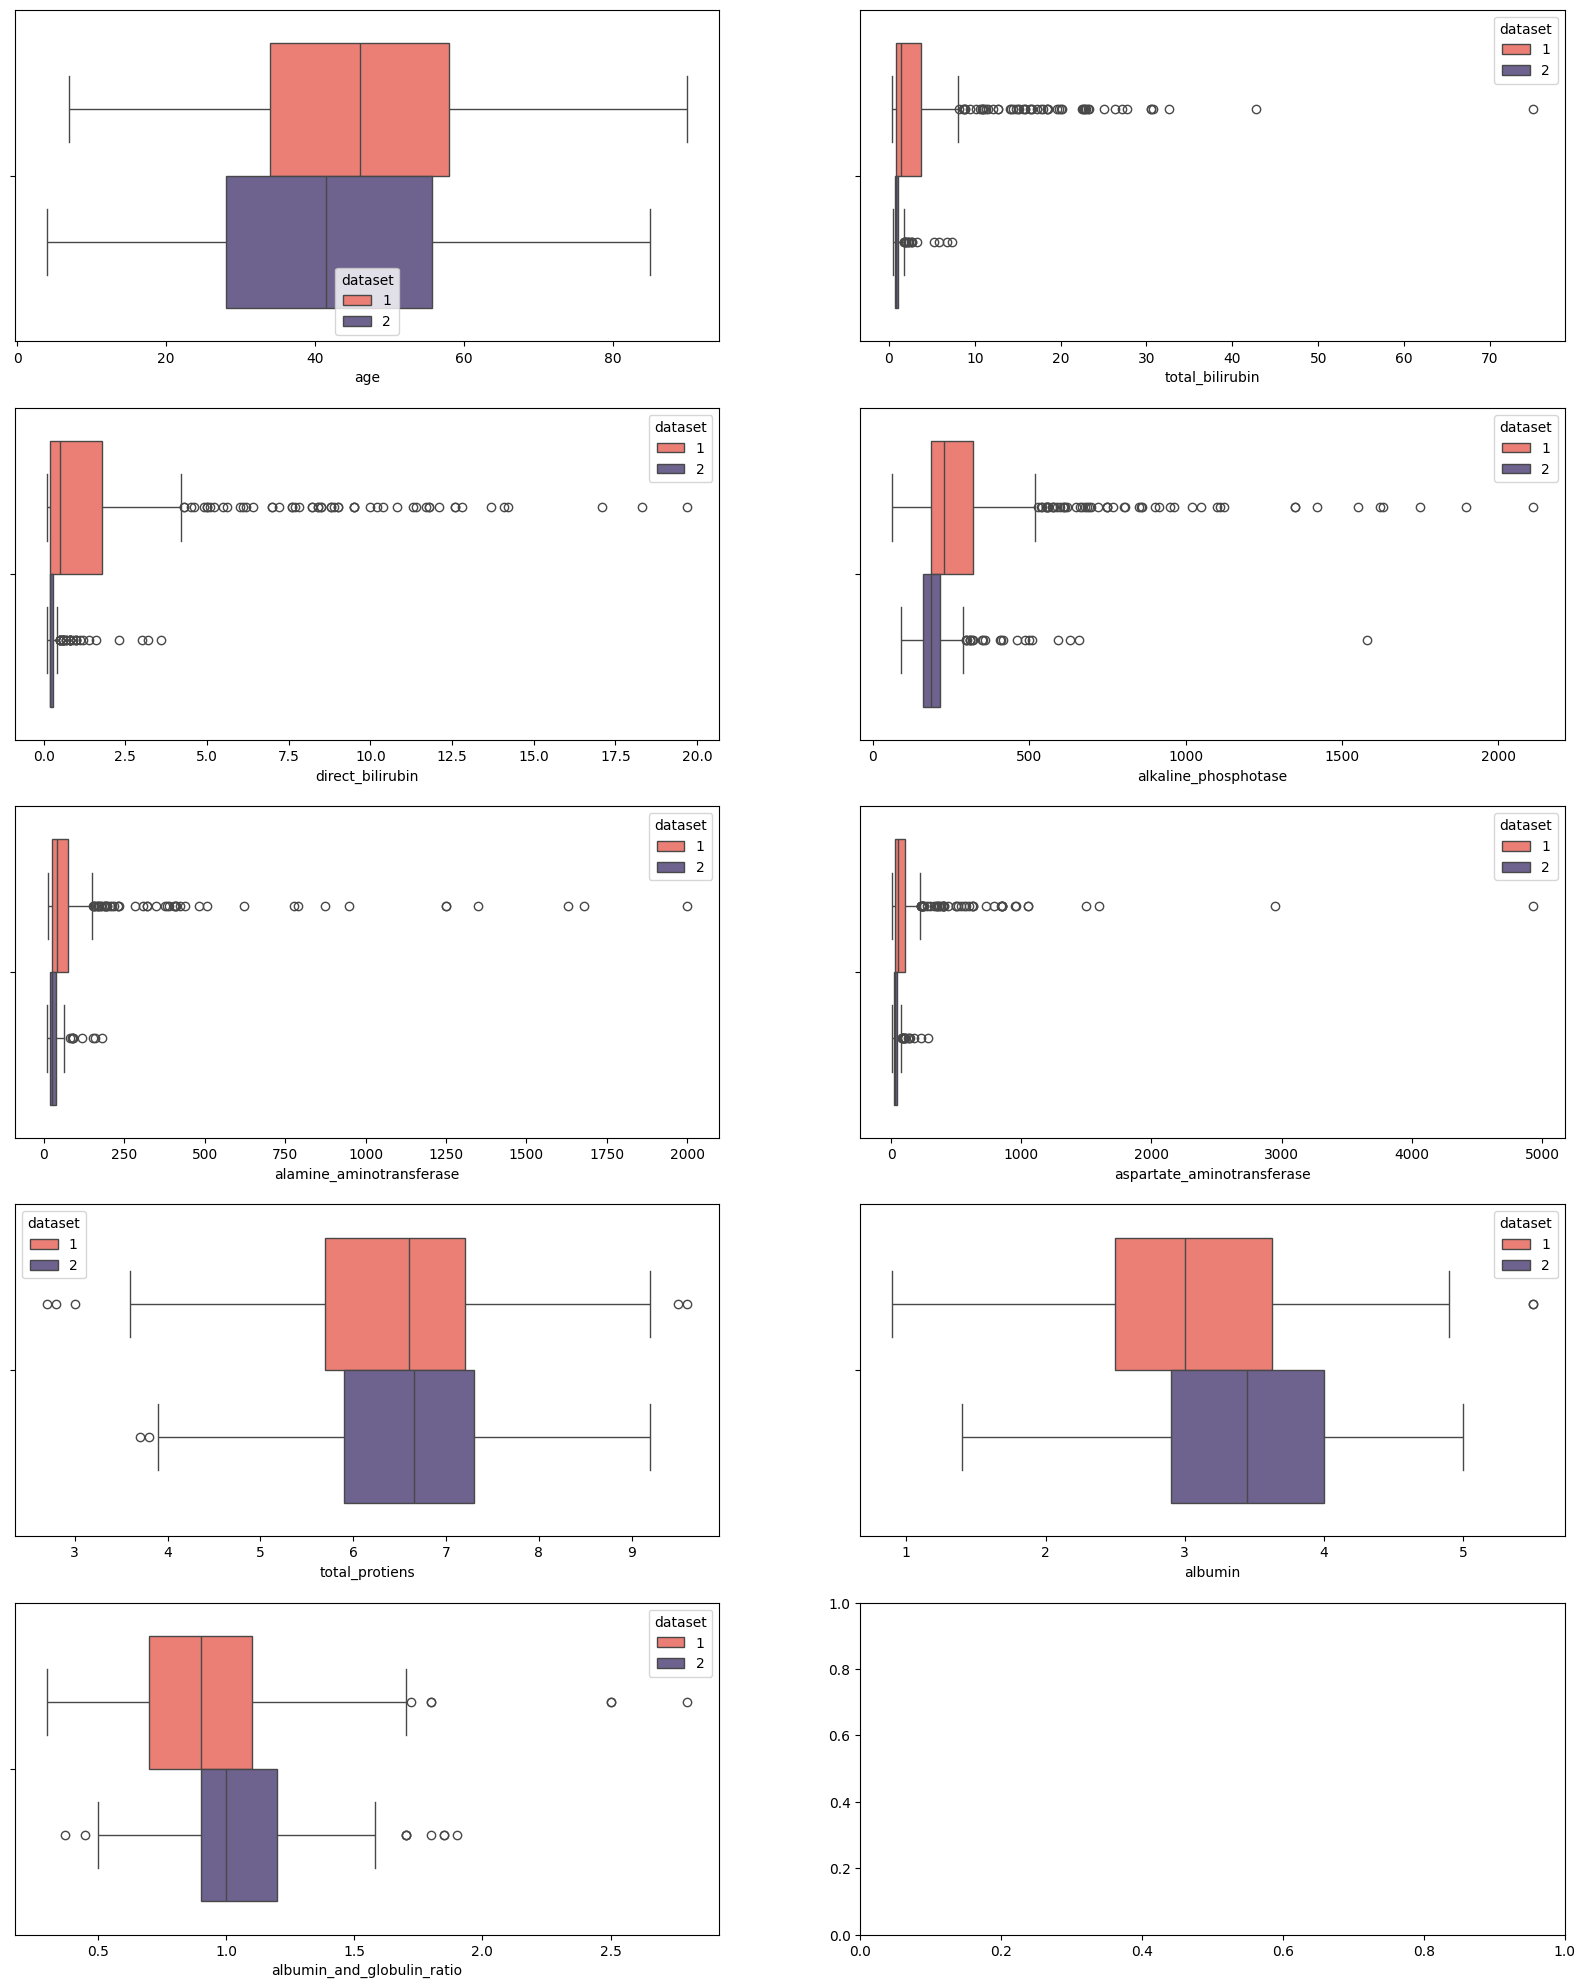

In [350]:
n_col =2 
n_row = (len(num_col.columns) + 1) // n_col

fig, ax = plt.subplots(n_row, n_col, figsize=(20, 5*n_row))
ax = ax.flatten()

for i,col in enumerate(num_col.columns):
    sns.boxplot(data=df,x=df[col],ax=ax[i],
                hue='dataset',
                palette=my_col)

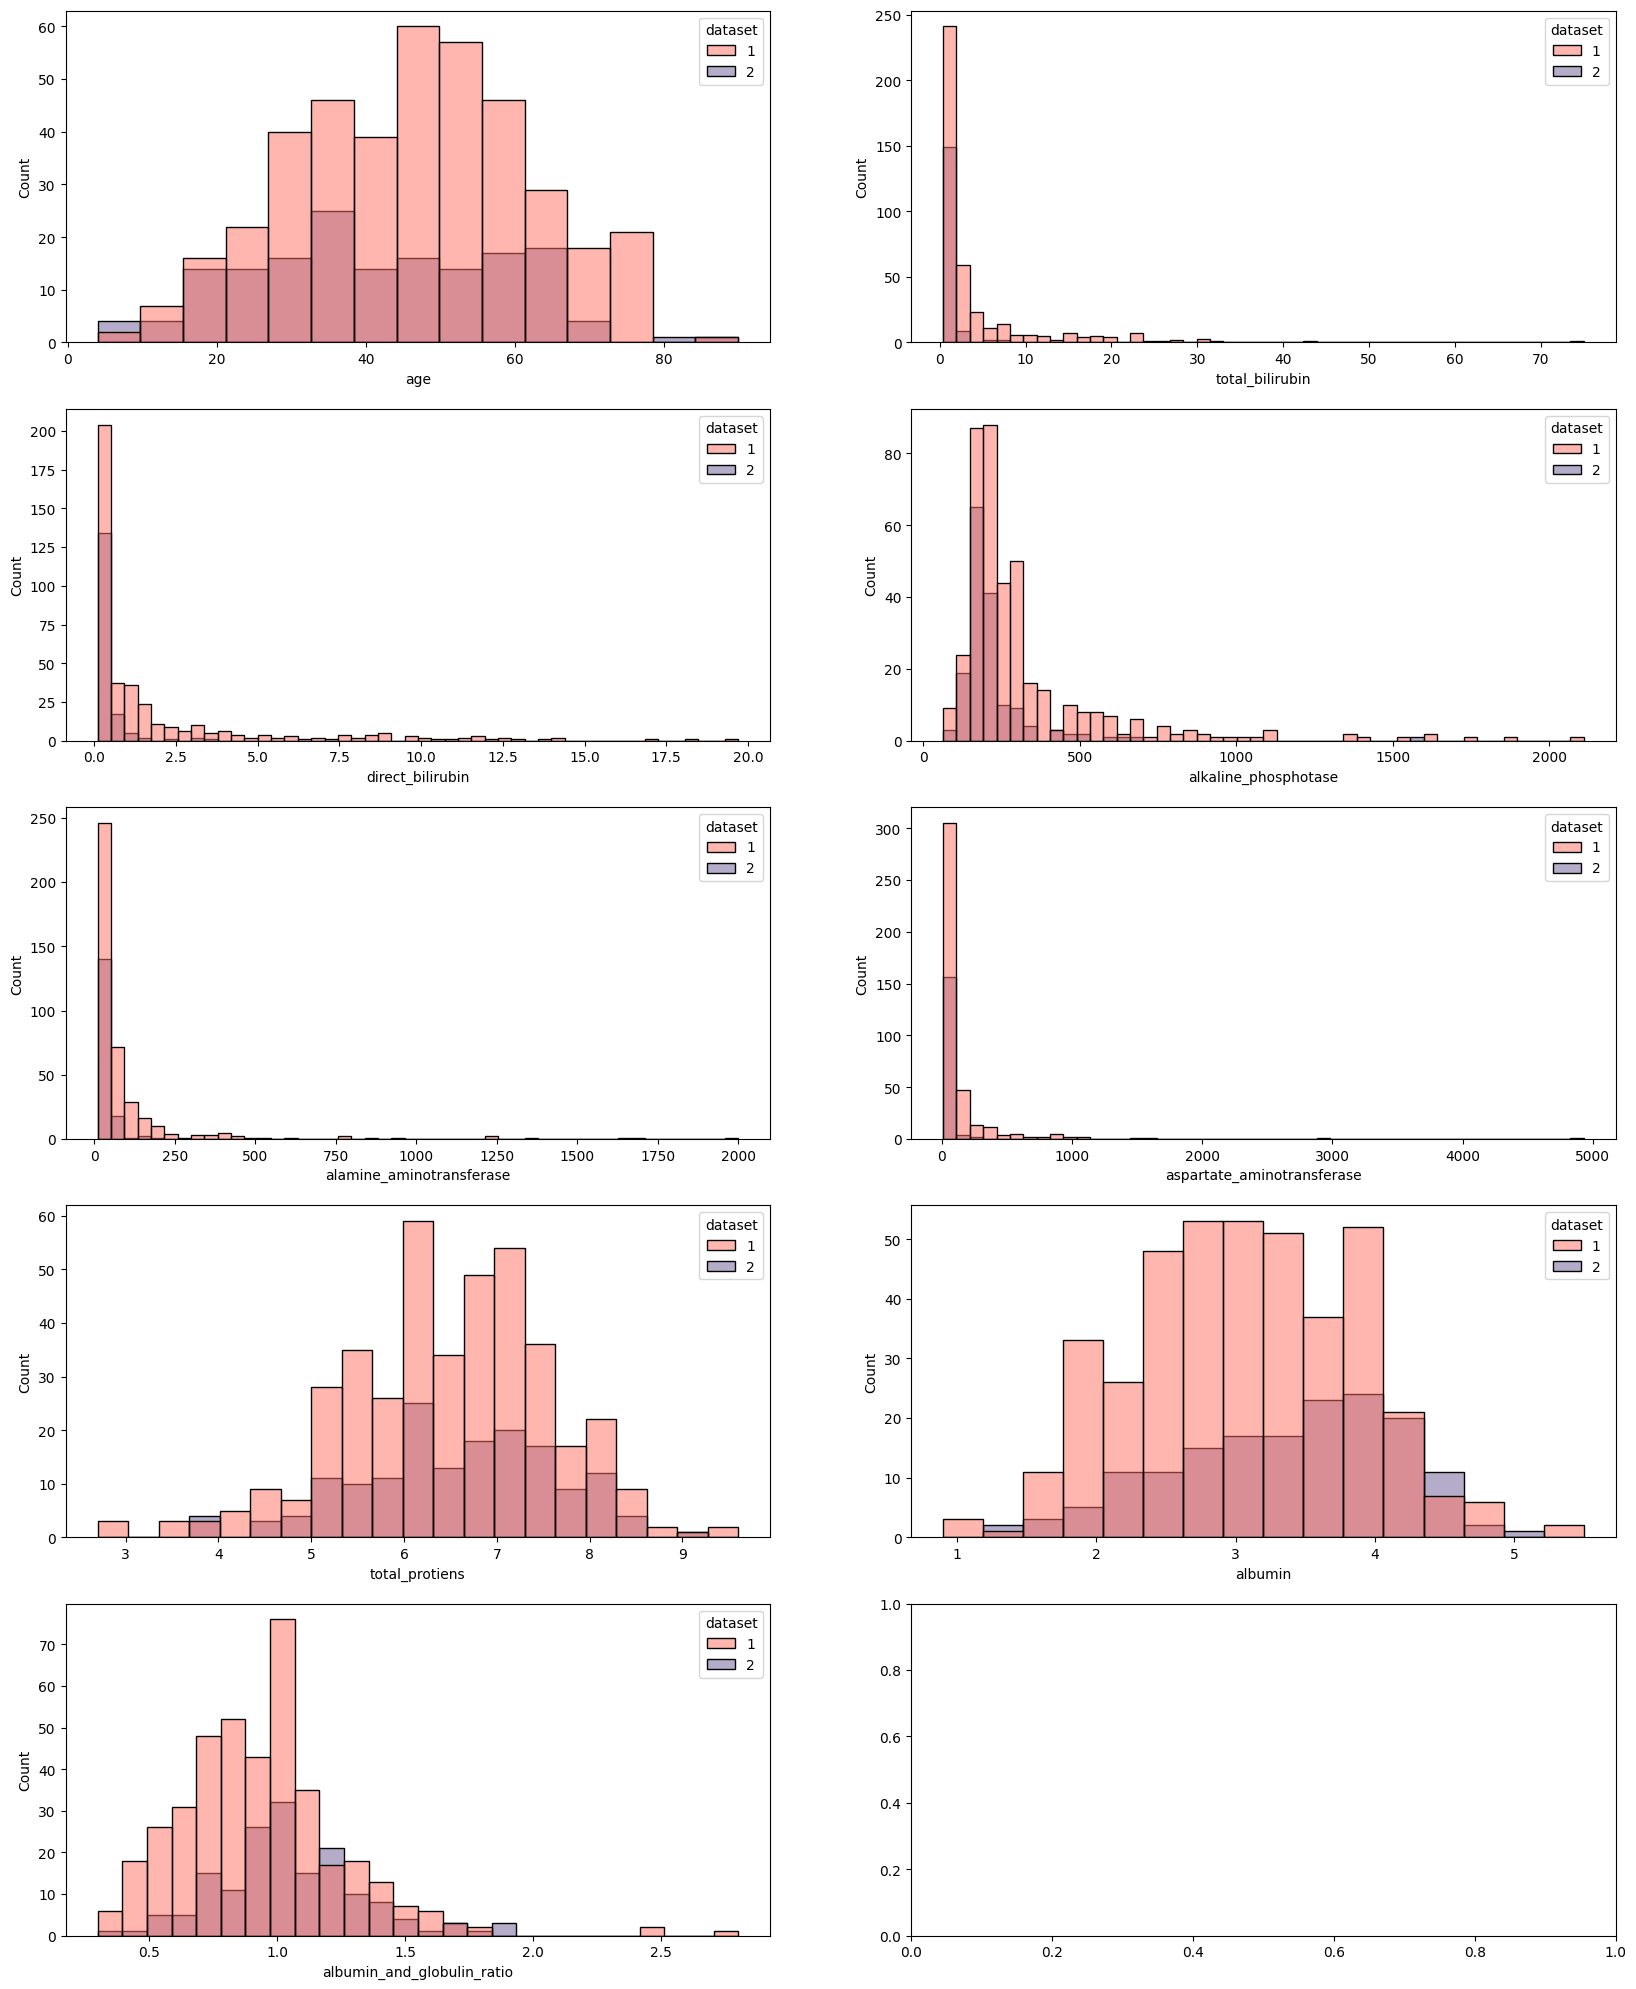

In [351]:
n_col =2 
n_row = (len(num_col.columns) + 1) // n_col

fig, ax = plt.subplots(n_row, n_col, figsize=(20, 5*n_row))
ax = ax.flatten()

for i,col in enumerate(num_col.columns):
    sns.histplot(data=df,x=df[col],ax=ax[i],
                hue='dataset',
                palette=my_col)

In [352]:
RL = []
for i in num_col.columns:
        
    from scipy.stats import ttest_ind
    print(25*'-',i,25*'-')
    # Class A and B scores
    class_a = df[df['dataset'] == 1][i]
    class_b = df[df['dataset'] == 2][i]

    # Perform two-sample t-test (assume equal variances)
    t_stat, p_val = ttest_ind(class_a, class_b)

    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_val:.6f}")

    # Interpretation
    alpha = 0.05
    if p_val < alpha:
        print("Reject the null hypothesis: The class averages are significantly different.")
        RL.append(i)
    else:
        print("Fail to reject the null hypothesis: No significant difference.")
    print(50*'*')
print(RL)

------------------------- age -------------------------
t-statistic: 3.2069
p-value: 0.001418
Reject the null hypothesis: The class averages are significantly different.
**************************************************
------------------------- total_bilirubin -------------------------
t-statistic: 5.4704
p-value: 0.000000
Reject the null hypothesis: The class averages are significantly different.
**************************************************
------------------------- direct_bilirubin -------------------------
t-statistic: 6.1561
p-value: 0.000000
Reject the null hypothesis: The class averages are significantly different.
**************************************************
------------------------- alkaline_phosphotase -------------------------
t-statistic: 4.4971
p-value: 0.000008
Reject the null hypothesis: The class averages are significantly different.
**************************************************
------------------------- alamine_aminotransferase -----------------------

In [353]:
for col in num_col.columns:
    px.histogram(df,x=col,color='dataset').show()

<Axes: >

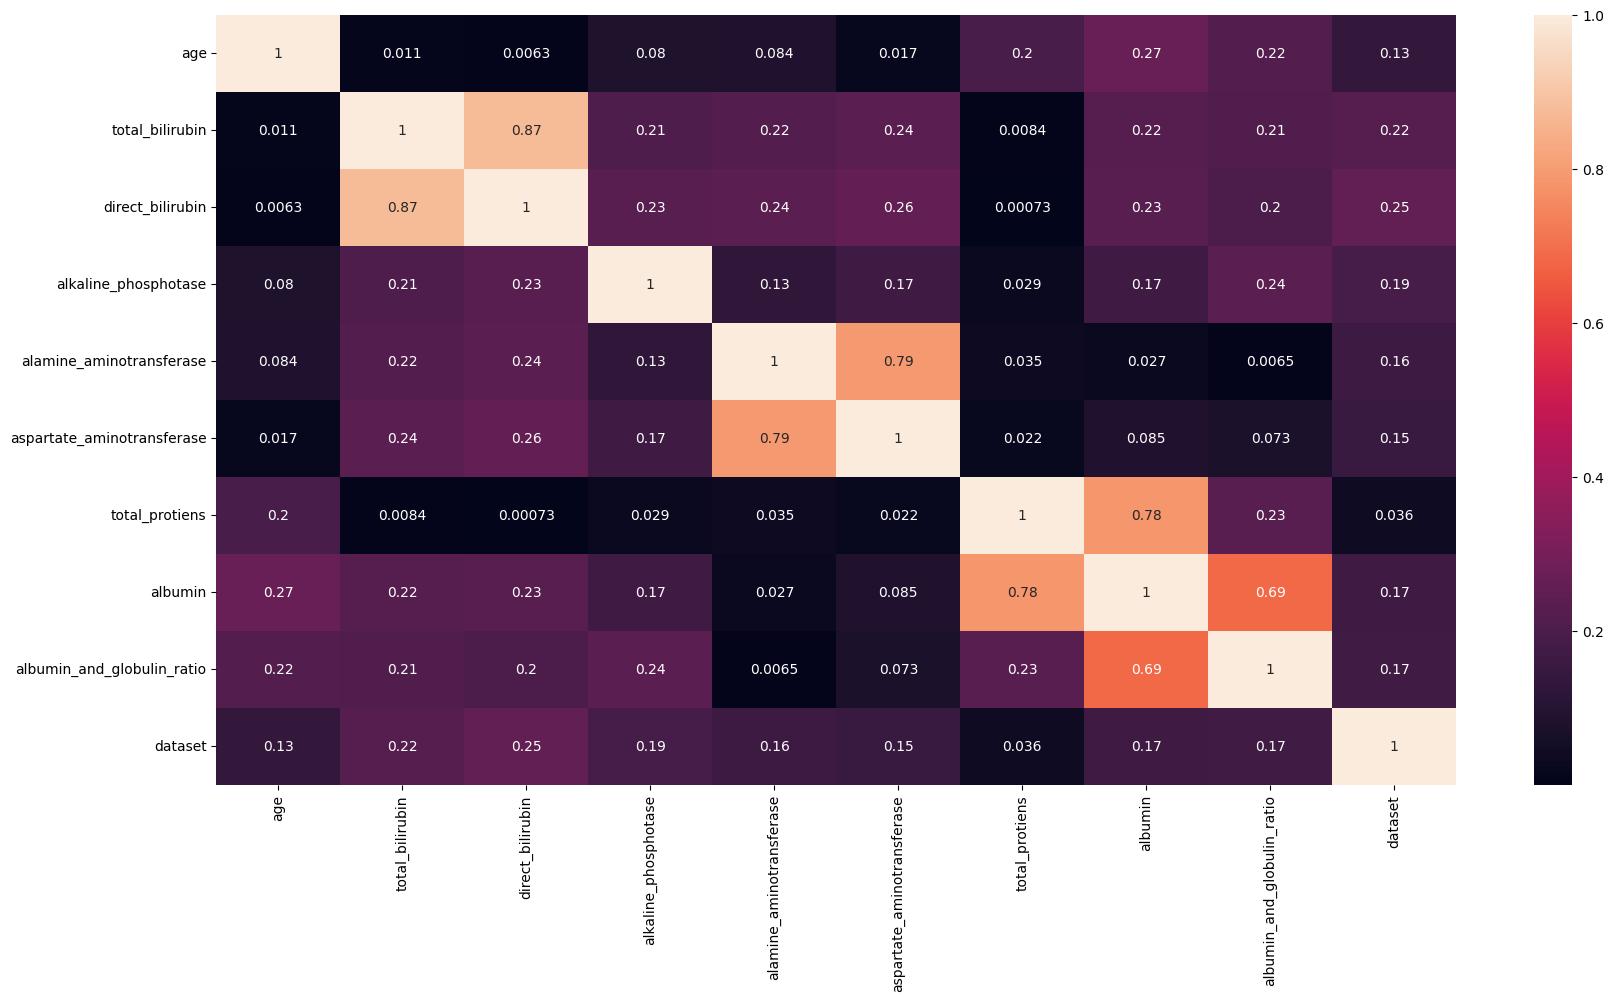

In [354]:
plt.figure(figsize=(20,10))
sns.heatmap(abs(df.corr(numeric_only=True)),annot=True)

<Axes: >

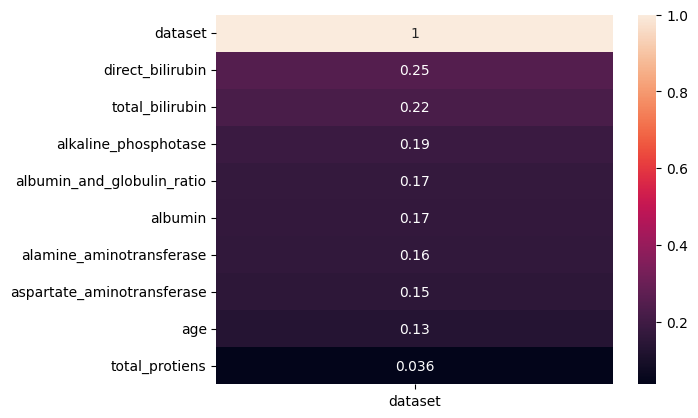

In [355]:
corr = abs(df.corr(numeric_only=True))
sns.heatmap(corr[['dataset']].sort_values(by='dataset',ascending=False),annot=True)

## Feauture Scaling

In [356]:
x = num_col[RL]
x

,age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,albumin,albumin_and_globulin_ratio
0,65,0.7,0.1,187,16,18,3.3,0.90
1,62,10.9,5.5,699,64,100,3.2,0.74
2,62,7.3,4.1,490,60,68,3.3,0.89
3,58,1.0,0.4,182,14,20,3.4,1.00
4,72,3.9,2.0,195,27,59,2.4,0.40
...,...,...,...,...,...,...,...,...
561,60,0.5,0.1,500,20,34,1.6,0.37
562,40,0.6,0.1,98,35,31,3.2,1.10
563,52,0.8,0.2,245,48,49,3.2,1.00
564,31,1.3,0.5,184,29,32,3.4,1.00


In [357]:
y = y.replace({
    1:0,
    2:1
})

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=42,shuffle=True)

In [359]:
y_train.value_counts()

dataset
0    311
1    113
Name: count, dtype: int64

In [360]:
'''from sklearn.preprocessing import RobustScaler
RS = RobustScaler()
x_train = pd.DataFrame(RS.fit_transform(x_train),columns=RS.get_feature_names_out())
x_test = pd.DataFrame(RS.transform(x_test),columns=RS.get_feature_names_out())'''

'from sklearn.preprocessing import RobustScaler\nRS = RobustScaler()\nx_train = pd.DataFrame(RS.fit_transform(x_train),columns=RS.get_feature_names_out())\nx_test = pd.DataFrame(RS.transform(x_test),columns=RS.get_feature_names_out())'

In [361]:
from sklearn.preprocessing import QuantileTransformer
QT = QuantileTransformer(output_distribution='normal',random_state=42)
x_train = pd.DataFrame(QT.fit_transform(x_train),columns=QT.get_feature_names_out())
x_test = pd.DataFrame(QT.transform(x_test),columns=QT.get_feature_names_out())

In [362]:
print(y_train.value_counts())
from imblearn.over_sampling import ADASYN
ada = ADASYN()
x_train, y_train = ada.fit_resample(x_train, y_train)
print(y_train.value_counts())

dataset
0    311
1    113
Name: count, dtype: int64
dataset
1    318
0    311
Name: count, dtype: int64


In [363]:
# importing models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,confusion_matrix

In [364]:
# Assign the models to a dictionary
model = {
    'LogisticRegression' : LogisticRegression(class_weight='balanced'),
    'SVC' : SVC(class_weight='balanced'),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(class_weight='balanced'),
    'RandomForestClassifier' : RandomForestClassifier(class_weight='balanced'),
    'GaussianNB' : GaussianNB(),
    
}

LogisticRegression
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.72      0.62      0.67       311
           1       0.67      0.77      0.72       318

    accuracy                           0.69       629
   macro avg       0.70      0.69      0.69       629
weighted avg       0.70      0.69      0.69       629

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.91      0.62      0.74        93
           1       0.55      0.88      0.68        49

    accuracy                           0.71       142
   macro avg       0.73      0.75      0.71       142
weighted avg       0.78      0.71      0.72       142

----------------------

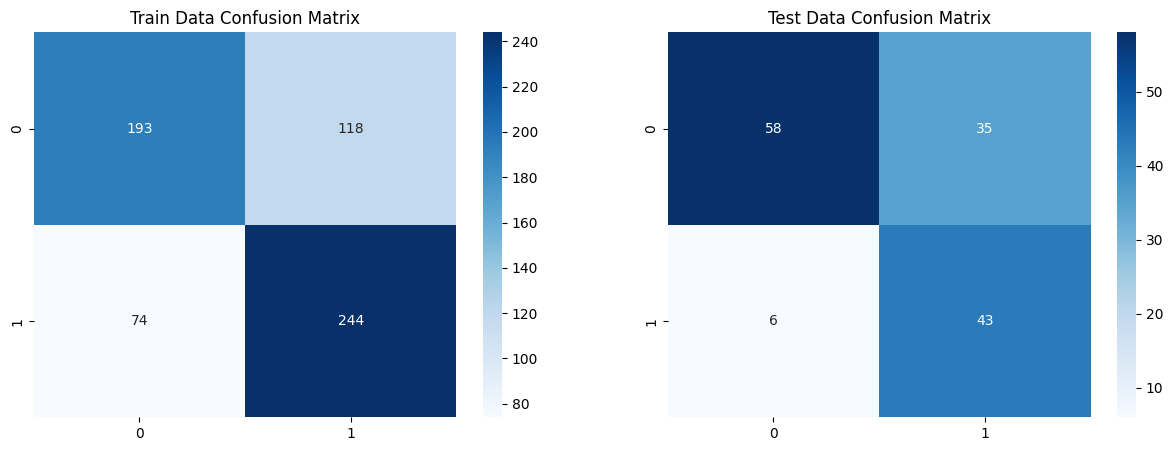

***************************************************************************
SVC
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.80      0.62      0.70       311
           1       0.70      0.85      0.77       318

    accuracy                           0.74       629
   macro avg       0.75      0.74      0.74       629
weighted avg       0.75      0.74      0.74       629

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.83      0.57      0.68        93
           1       0.49      0.78      0.60        49

    accuracy                           0.64       142
   macro avg       0.66      0.67      0.64       142
weighted avg    

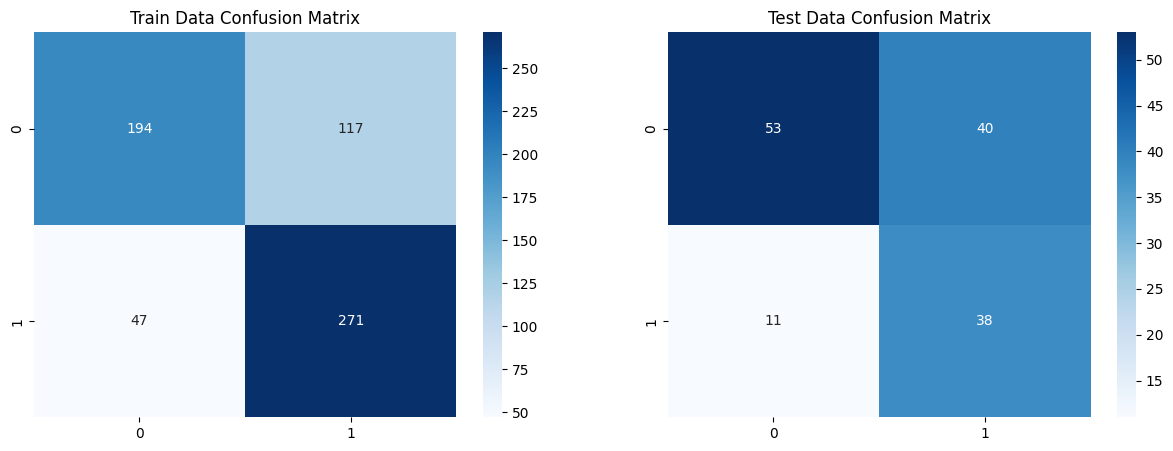

***************************************************************************
KNeighborsClassifier
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.99      0.70      0.82       311
           1       0.77      0.99      0.87       318

    accuracy                           0.85       629
   macro avg       0.88      0.85      0.84       629
weighted avg       0.88      0.85      0.84       629

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.80      0.57      0.67        93
           1       0.47      0.73      0.58        49

    accuracy                           0.63       142
   macro avg       0.64      0.65      0.62       142

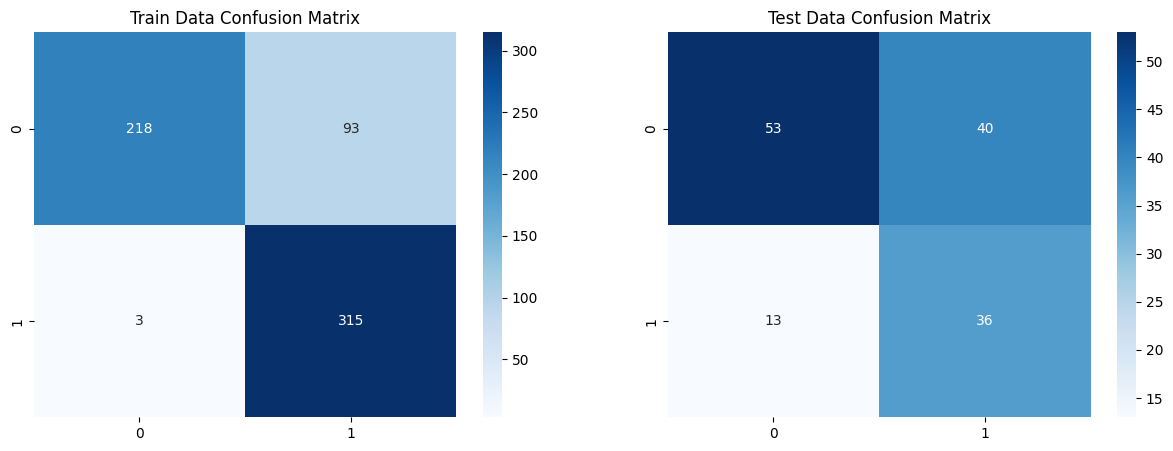

***************************************************************************
DecisionTreeClassifier
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       311
           1       1.00      1.00      1.00       318

    accuracy                           1.00       629
   macro avg       1.00      1.00      1.00       629
weighted avg       1.00      1.00      1.00       629

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.69      0.72      0.71        93
           1       0.42      0.39      0.40        49

    accuracy                           0.61       142
   macro avg       0.56      0.55      0.55       1

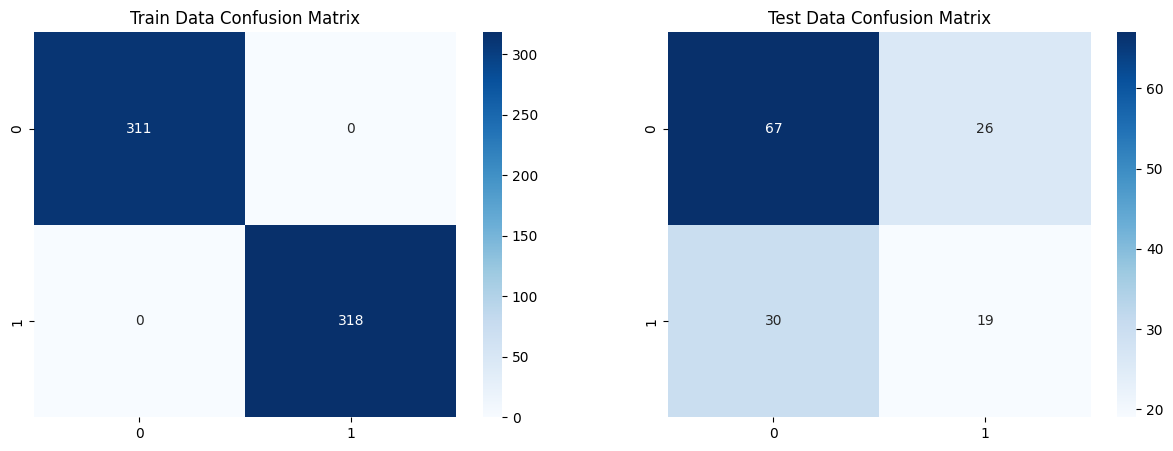

***************************************************************************
RandomForestClassifier
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       311
           1       1.00      1.00      1.00       318

    accuracy                           1.00       629
   macro avg       1.00      1.00      1.00       629
weighted avg       1.00      1.00      1.00       629

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.76      0.77      0.77        93
           1       0.55      0.53      0.54        49

    accuracy                           0.69       142
   macro avg       0.66      0.65      0.65       1

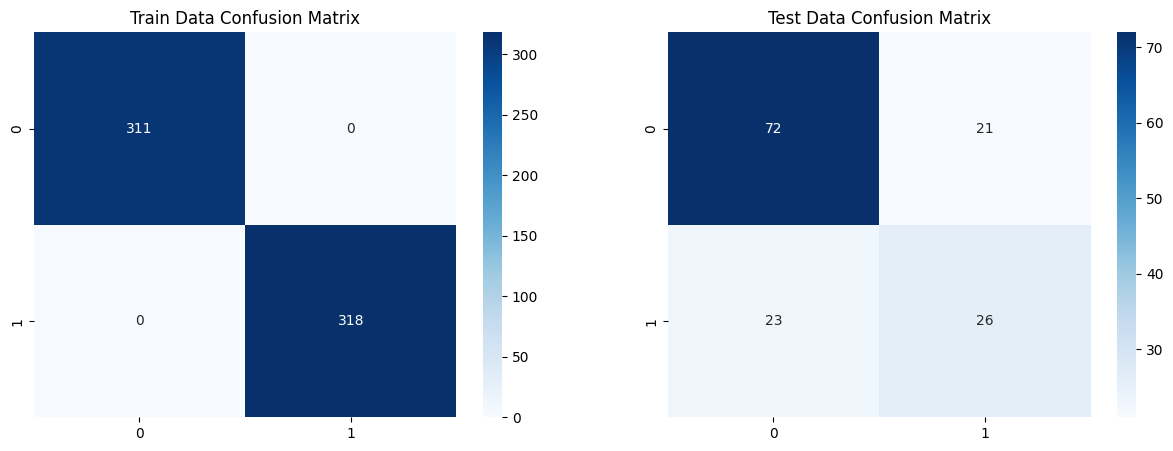

***************************************************************************
GaussianNB
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.75      0.59      0.66       311
           1       0.67      0.81      0.73       318

    accuracy                           0.70       629
   macro avg       0.71      0.70      0.69       629
weighted avg       0.71      0.70      0.69       629

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.91      0.57      0.70        93
           1       0.52      0.90      0.66        49

    accuracy                           0.68       142
   macro avg       0.72      0.73      0.68       142
weighted 

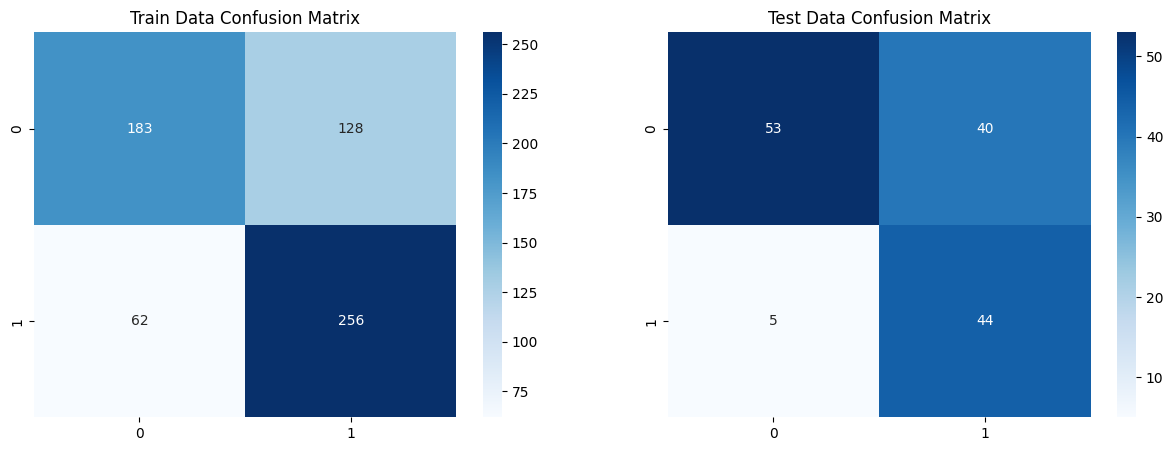

***************************************************************************


In [365]:
for i in model:
    print(i)
    print(75*'*')
    model[i].fit(x_train,y_train)
    y_train_pread = model[i].predict(x_train)
    y_test_pread = model[i].predict(x_test)
    
    print(25*"-","Train Data Matrix Report",25*"-")

    print(classification_report(y_train, y_train_pread))
    print(75*"-")
    print(25*"-","Test Data Matrix Report",25*"-")
    print(classification_report(y_test, y_test_pread))
    print(75*"-")

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
    ax[0].set_title('Train Data Confusion Matrix')

    sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
    ax[1].set_title('Test Data Confusion Matrix')

    plt.show()
    print(75*'*')

------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.88      0.58      0.70       311
           1       0.69      0.92      0.79       318

    accuracy                           0.75       629
   macro avg       0.79      0.75      0.75       629
weighted avg       0.78      0.75      0.75       629

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.88      0.57      0.69        93
           1       0.51      0.86      0.64        49

    accuracy                           0.67       142
   macro avg       0.70      0.71      0.67       142
weighted avg       0.76      0.67      0.68       142

---------------------------------------------------------------------------


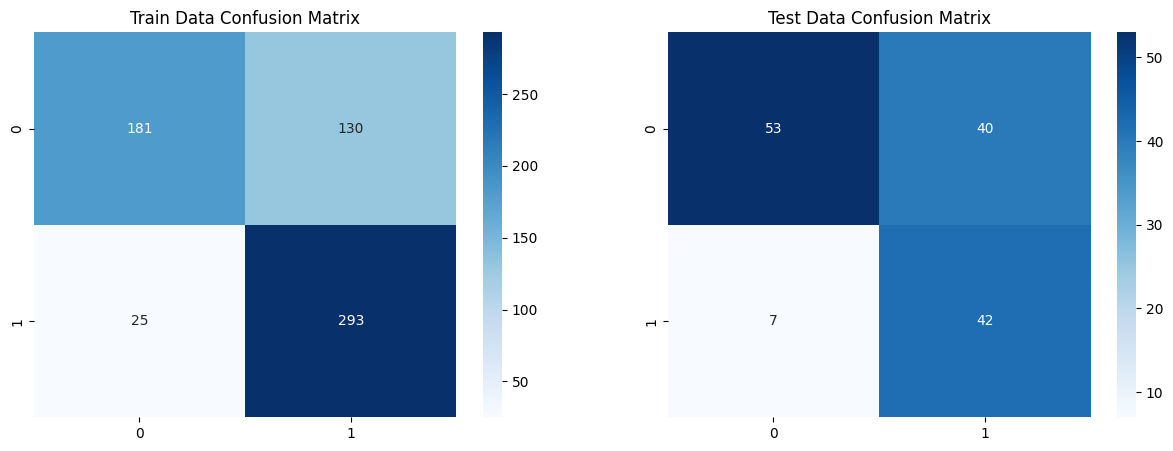

***************************************************************************


In [366]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=50,
    max_depth=4,
    min_samples_split=5,
    min_samples_leaf=5
    
)
RFC.fit(x_train, y_train)

y_train_pread = RFC.predict(x_train)
y_test_pread = RFC.predict(x_test)

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

plt.show()
print(75*'*')


Test Accuracy: 0.704225352112676
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       311
           1       0.96      0.98      0.97       318

    accuracy                           0.97       629
   macro avg       0.97      0.97      0.97       629
weighted avg       0.97      0.97      0.97       629

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        93
           1       0.59      0.49      0.53        49

    accuracy                           0.70       142
   macro avg       0.67      0.65      0.66       142
weighted avg       0.69      0.70      0.70       142

---------------------------------------------------------------------------


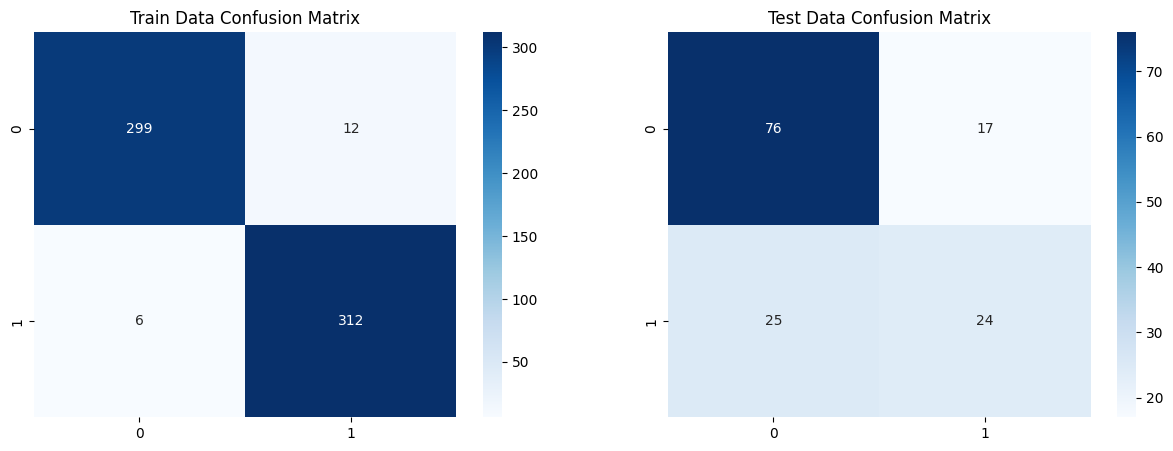

***************************************************************************


In [367]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,          # reduce or tune
    learning_rate=0.05,        # smaller learning rate
    max_depth=3,               # shallower trees
    subsample=0.8,             # row sampling
    colsample_bytree=0.8,      # feature sampling
    reg_alpha=0.1,             # L1 regularization
    reg_lambda=1.0,            # L2 regularization
    scale_pos_weight=1,        # adjust for imbalance if needed
    eval_metric="logloss",
    random_state=42
)

xgb.fit(x_train, y_train)
print("Test Accuracy:", xgb.score(x_test, y_test))


y_train_pread = xgb.predict(x_train)
y_test_pread = xgb.predict(x_test)

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

plt.show()
print(75*'*')

------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.72      0.62      0.67       311
           1       0.67      0.77      0.72       318

    accuracy                           0.69       629
   macro avg       0.70      0.69      0.69       629
weighted avg       0.70      0.69      0.69       629

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.91      0.62      0.74        93
           1       0.55      0.88      0.68        49

    accuracy                           0.71       142
   macro avg       0.73      0.75      0.71       142
weighted avg       0.78      0.71      0.72       142

---------------------------------------------------------------------------


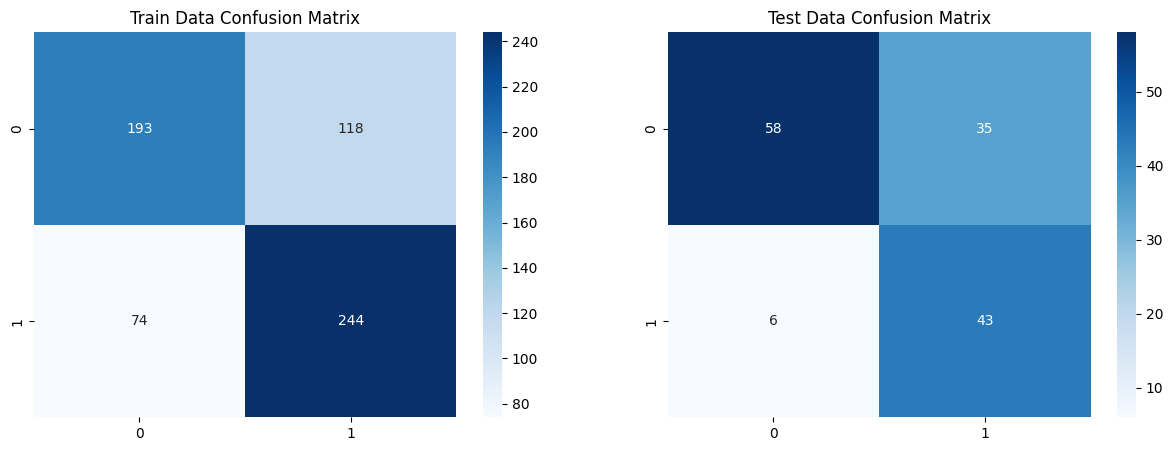

***************************************************************************


In [368]:
LR = LogisticRegression(class_weight='balanced')
LR.fit(x_train,y_train)
y_train_pread = LR.predict(x_train)
y_test_pread = LR.predict(x_test)

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

plt.show()
print(75*'*')

Train AUC: 0.7426136018928593
Test AUC: 0.7748518762343647


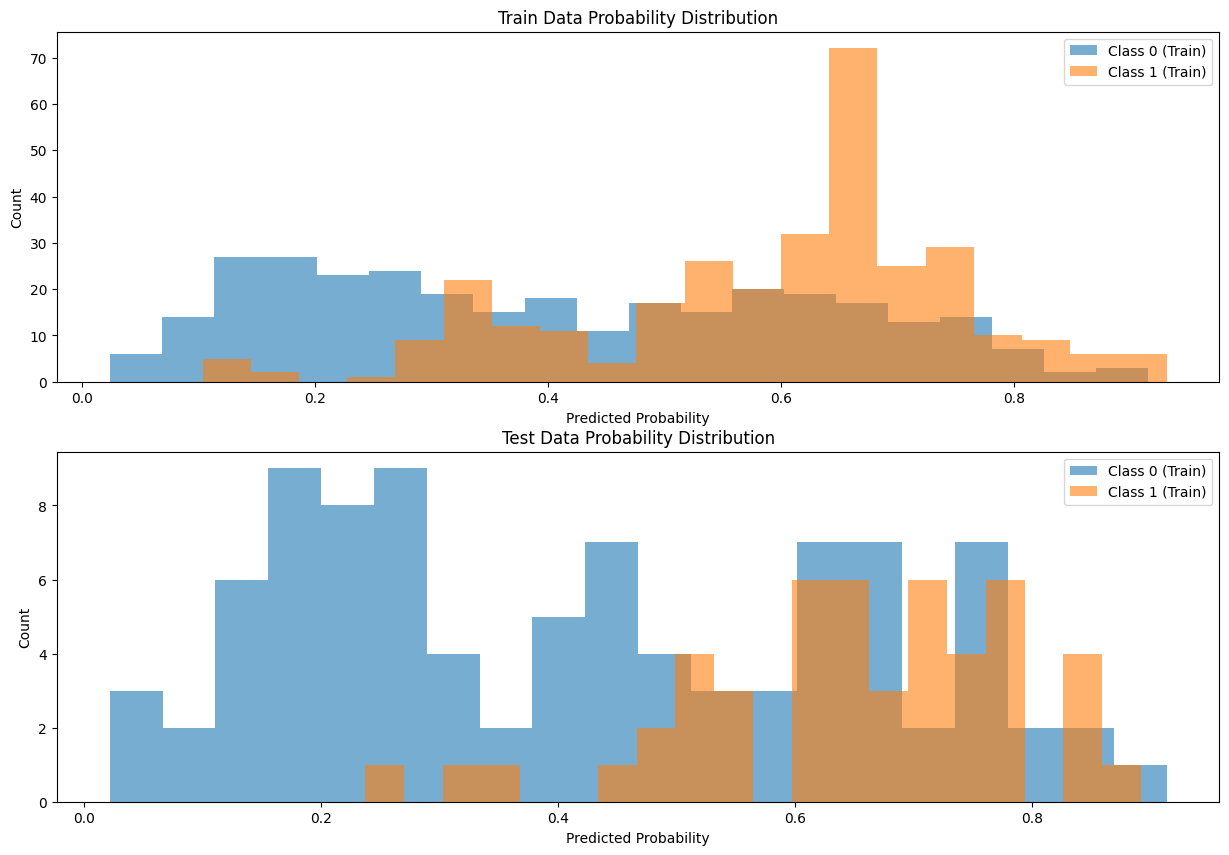

In [369]:
from sklearn.metrics import roc_auc_score

# Get prediction probabilities
y_train_prob = LR.predict_proba(x_train)[:, 1]
y_test_prob = LR.predict_proba(x_test)[:, 1]

# ROC–AUC
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)
print("Train AUC:",train_auc)
print("Test AUC:",test_auc)


# Probability distributions
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)

plt.hist(y_train_prob[y_train==0], bins=20, alpha=0.6, label="Class 0 (Train)")
plt.hist(y_train_prob[y_train==1], bins=20, alpha=0.6, label="Class 1 (Train)")
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.title("Train Data Probability Distribution")
plt.legend()

plt.subplot(2,1,2)
plt.hist(y_test_prob[y_test==0], bins=20, alpha=0.6, label="Class 0 (Train)")
plt.hist(y_test_prob[y_test==1], bins=20, alpha=0.6, label="Class 1 (Train)")
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.title("Test Data Probability Distribution")
plt.legend()


plt.show()


## 🧾 Liver Function Test (LFT) – Ranges & Interpretation

| **Test**                                   | **Normal Range** | **Mild Elevation**          | **Moderate Elevation**     | **Severe Elevation**        | **Extreme Severe**                                        |
| ------------------------------------------ | ---------------- | --------------------------- | -------------------------- | --------------------------- | --------------------------------------------------------- |
| **Total Bilirubin**                        | 0.3 – 1.2 mg/dL  | 1.3 – 3.0 mg/dL             | 3.1 – 10 mg/dL             | 10 – 20 mg/dL               | >20 mg/dL (risk of severe jaundice, liver failure)        |
| **Direct Bilirubin**                       | 0.0 – 0.3 mg/dL  | 0.4 – 1.0 mg/dL             | 1.1 – 5.0 mg/dL            | 5.1 – 10 mg/dL              | >10 mg/dL (severe obstruction/liver failure)              |
| **ALP (Alkaline Phosphatase)**             | 44 – 147 U/L     | 148 – 250 U/L               | 251 – 1000 U/L             | 1001 – 2000 U/L             | >2000 U/L (advanced liver/bone disease)                   |
| **ALT (Alanine Aminotransferase, SGPT)**   | 7 – 56 U/L       | 57 – 150 U/L                | 151 – 500 U/L              | 501 – 2000 U/L              | >2000 U/L (acute viral/toxic/ischemic hepatitis)          |
| **AST (Aspartate Aminotransferase, SGOT)** | 8 – 45 U/L       | 46 – 120 U/L                | 121 – 400 U/L              | 401 – 2000 U/L              | >2000 U/L (acute hepatitis, shock liver, toxins)          |
| **Total Protein**                          | 6.0 – 8.3 g/dL   | 5.0 – 5.9 or 8.4 – 9.0 g/dL | 4.0 – 4.9 or 9.1 – 11 g/dL | 3.0 – 3.9 or 11.1 – 12 g/dL | <3.0 or >12 g/dL (life-threatening malnutrition, myeloma) |
| **Albumin**                                | 3.5 – 5.0 g/dL   | 3.0 – 3.4 g/dL              | 2.0 – 2.9 g/dL             | 1.5 – 1.9 g/dL              | <1.5 g/dL (severe edema, ascites, critical illness)       |
| **Globulin**                               | 2.0 – 3.5 g/dL   | 3.6 – 4.5 g/dL              | 4.6 – 6.0 g/dL             | 6.1 – 8.0 g/dL              | >8.0 g/dL (multiple myeloma, advanced autoimmune disease) |
| **A/G Ratio**                              | 1.0 – 2.0        | 0.8 – 0.9 or >2.1           | 0.6 – 0.7 or >2.3          | 0.4 – 0.5 or >2.5           | <0.4 (severe liver/kidney disease, myeloma)               |


In [370]:
df[df['total_bilirubin'] > 2]['dataset'].value_counts()

dataset
1    157
2     11
Name: count, dtype: int64

In [371]:
df[df['direct_bilirubin'] > 1]['dataset'].value_counts()

dataset
1    153
2      8
Name: count, dtype: int64

In [372]:
df[df['alkaline_phosphotase'] > 150]['dataset'].value_counts()

dataset
1    368
2    140
Name: count, dtype: int64

In [373]:
df[df['alamine_aminotransferase'] > 50]['dataset'].value_counts() 

dataset
1    159
2     22
Name: count, dtype: int64

In [374]:
df[df['aspartate_aminotransferase'] > 50]['dataset'].value_counts() 

dataset
1    205
2     33
Name: count, dtype: int64

In [375]:
df[df['total_protiens'] > 4.5]['dataset'].value_counts() 

dataset
1    384
2    156
Name: count, dtype: int64

In [376]:
df[df['albumin'] < 3]['dataset'].value_counts() 

dataset
1    175
2     47
Name: count, dtype: int64

In [377]:
df[df['albumin_and_globulin_ratio'] < 1]['dataset'].value_counts() 

dataset
1    224
2     64
Name: count, dtype: int64

In [378]:
df['AST/ALT_ratio'] = df['aspartate_aminotransferase'] / df['alamine_aminotransferase']

In [379]:
df.columns

Index(['age', 'gender', 'total_bilirubin', 'direct_bilirubin',
       'alkaline_phosphotase', 'alamine_aminotransferase',
       'aspartate_aminotransferase', 'total_protiens', 'albumin',
       'albumin_and_globulin_ratio', 'dataset', 'AST/ALT_ratio'],
      dtype='object')

In [380]:
not_cld_df = df[(df['total_bilirubin'] >=0.3) &
               (df['total_bilirubin'] <=1.2) &

               (df['direct_bilirubin'] <=0.3) & 

               (df['alkaline_phosphotase'] >=44) &
               (df['alkaline_phosphotase'] <=147) &

               (df['alamine_aminotransferase'] >=7) &
               (df['alamine_aminotransferase'] <=56) &

               (df['aspartate_aminotransferase'] >=8) &
               (df['aspartate_aminotransferase'] <=45) &

               (df['AST/ALT_ratio'] <1) &
               

               (df['total_protiens'] >=6) &
               (df['total_protiens'] <=8.3) &

               (df['albumin'] >=3.5) &
               (df['albumin'] <=5) &

               (df['albumin_and_globulin_ratio'] >=1) &
               (df['albumin_and_globulin_ratio'] <=2) 

               ]
not_cld_df

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,dataset,AST/ALT_ratio
190,21,male,1.0,0.3,142,27,21,6.4,3.5,1.2,2,0.777778
335,26,female,0.7,0.2,144,36,33,8.2,4.3,1.1,1,0.916667
354,33,male,0.8,0.2,135,30,29,7.2,4.4,1.5,2,0.966667
356,25,female,0.7,0.1,140,32,25,7.6,4.3,1.3,2,0.781250
357,56,female,0.7,0.1,145,26,23,7.0,4.0,1.3,2,0.884615


In [381]:
cld_df = df[(df['total_bilirubin'] >2) & 
         (df['albumin_and_globulin_ratio'] < 1) &
         (df['alamine_aminotransferase'] > 50 ) &
         (df['aspartate_aminotransferase']  > 50) &
         (df['AST/ALT_ratio'] >=1)&
         (df['albumin'] < 3) &
         (df['albumin_and_globulin_ratio'] < 1)
         ]
cld_df

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,dataset,AST/ALT_ratio
46,55,male,18.4,8.8,206,64,178,6.2,1.8,0.40,1,2.781250
75,58,female,2.4,1.1,915,60,142,4.7,1.8,0.60,1,2.366667
89,60,male,5.2,2.4,168,126,202,6.8,2.9,0.70,1,1.603175
92,39,male,6.6,3.0,215,190,950,4.0,1.7,0.70,1,5.000000
107,50,male,5.8,3.0,661,181,285,5.7,2.3,0.67,2,1.574586
122,45,male,2.8,1.7,263,57,65,5.1,2.3,0.80,1,1.140351
128,66,male,11.3,5.6,1110,1250,4929,7.0,2.4,0.50,1,3.943200
129,46,female,4.7,2.2,310,62,90,6.4,2.5,0.60,1,1.451613
146,34,male,8.7,4.0,298,58,138,5.8,2.4,0.70,1,2.379310
150,60,male,11.0,4.9,750,140,350,5.5,2.1,0.60,1,2.500000


In [382]:
drop_in = not_cld_df.index.to_list()+cld_df.index.tolist()
drop_in

[190,
 335,
 354,
 356,
 357,
 46,
 75,
 89,
 92,
 107,
 122,
 128,
 129,
 146,
 150,
 151,
 156,
 175,
 187,
 243,
 244,
 315,
 402,
 425,
 468,
 502,
 512,
 514,
 519,
 536,
 542,
 543,
 544,
 545,
 559]

In [383]:
df.drop(drop_in,axis=0)

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,dataset,AST/ALT_ratio
0,65,female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1.125000
1,62,male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1.562500
2,62,male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1.133333
3,58,male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1.428571
4,72,male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,2.185185
...,...,...,...,...,...,...,...,...,...,...,...,...
561,60,male,0.5,0.1,500,20,34,5.9,1.6,0.37,2,1.700000
562,40,male,0.6,0.1,98,35,31,6.0,3.2,1.10,1,0.885714
563,52,male,0.8,0.2,245,48,49,6.4,3.2,1.00,1,1.020833
564,31,male,1.3,0.5,184,29,32,6.8,3.4,1.00,1,1.103448
